In [3]:
#import libraries
import pandas as pd
import numpy as np

In [4]:
#read csv of LA Metro Bikeshare Data
path = "metro-bike-share-trip-data.csv"
data = pd.read_csv(path)

In [34]:
data.tail().transpose()

132422  \
Trip ID                                                                      4907293   
Duration                                                                        2520   
Start Time                                                   2016-08-06T14:35:00.000   
End Time                                                     2016-08-06T15:17:00.000   
Starting Station ID                                                             3052   
Starting Station Latitude                                                    34.0511   
Starting Station Longitude                                                  -118.265   
Ending Station ID                                                               3052   
Ending Station Latitude                                                      34.0511   
Ending Station Longitude                                                    -118.265   
Bike ID                                                                         6316   
Plan Duration                                                                      0   
Trip Route Category                                                       Round Trip   
Passholder Type                                                              Walk-up   
Starting Lat-Long                  {'longitude': '-118.26456', 'latitude': '34.05...   
Ending Lat-Long                    {'longitude': '-118.26456', 'latitude': '34.05...   
Neighborhood Councils (Certified)                                                 76   
Council Districts                                                                 11   
Zip Codes                                                                      23078   
LA Specific Plans                                                                 54   
Precinct Boundaries                                                              847   
Census Tracts                                                                    567   

                                                                              132423  \
Trip ID                                                                      4908300   
Duration                                                                        1080   
Start Time                                                   2016-08-08T07:18:00.000   
End Time                                                     2016-08-08T07:36:00.000   
Starting Station ID                                                             3027   
Starting Station Latitude                                                      34.05   
Starting Station Longitude                                                  -118.247   
Ending Station ID                                                               3057   
Ending Station Latitude                                                      34.0357   
Ending Station Longitude                                                    -118.271   
Bike ID                                                                         6541   
Plan Duration                                                                     30   
Trip Route Category                                                          One Way   
Passholder Type                                                         Monthly Pass   
Starting Lat-Long                  {'longitude': '-118.24716', 'latitude': '34.04...   
Ending Lat-Long                    {'longitude': '-118.27081', 'latitude': '34.03...   
Neighborhood Councils (Certified)                                                 76   
Council Districts                                                                  9   
Zip Codes                                                                      23074   
LA Specific Plans                                                                  7   
Precinct Boundaries                                                              660   
Census Tracts                                                                    694   

                            

In [ ]:
#Column Names
#for col in data.columns:
 #   print(col)

In [93]:
trips = data[['Trip ID', 'Duration', 'Bike ID', 'Passholder Type', 'Starting Station ID', 'Ending Station ID', 'Starting Station Latitude', 'Starting Station Longitude' ]].dropna(how='any',axis=0).round(5)

In [94]:
#print(trips.shape)
#print(trips.isnull().sum())
#Null values are a very small number so can be eliminated

In [95]:
trips.head()

Trip ID  Duration  Bike ID Passholder Type  Starting Station ID  \
0  18222186     15060   5944.0         Walk-up               3031.0   
2  20444932     86400   5879.0         Walk-up               3026.0   
3  20905031     18840   6056.0         Walk-up               3023.0   
4  21031476     86400   6054.0       Flex Pass               3008.0   
6  21784648     14760   5923.0         Walk-up               3065.0   

   Ending Station ID  Starting Station Latitude  Starting Station Longitude  
0             3000.0                   34.04470                  -118.25244  
2             3000.0                   34.06318                  -118.24588  
3             3000.0                   34.05091                  -118.24097  
4             3000.0                   34.04661                  -118.26273  
6             3000.0                   34.06056                  -118.23833

In [96]:
#trips.corr()

In [97]:
# count trips IDs by Passholder types
passholder_type = trips[['Trip ID','Passholder Type']].groupby('Passholder Type').count()
passholder_type

Trip ID
Passholder Type         
Flex Pass           9506
Monthly Pass       81245
Staff Annual         322
Walk-up            41203

In [98]:
passholder_duration = (trips[['Duration','Passholder Type']].groupby('Passholder Type').mean())/60 #Divided by 60 to get minutes
passholder_duration

Duration
Passholder Type           
Flex Pass        19.977067
Monthly Pass     14.275857
Staff Annual     29.298137
Walk-up          49.373856

In [170]:
import plotly.express as px
fig = px.box(trips, x="Passholder Type", y="Duration", notched=True) #, color="smoker", notched=True)
fig.show()

In [104]:
duration_by_station = (trips[['Duration','Starting Station ID', 'Starting Station Longitude', 'Starting Station Latitude']].groupby(['Starting Station ID','Starting Station Longitude','Starting Station Latitude' ]).mean())/60 #Divided by 60 to get minutes
duration_by_station.head()

Duration
Starting Station ID Starting Station Longitude Starting Station Latitude           
3005.0              -118.25905                 34.04855                   24.961893
3006.0              -118.25667                 34.04554                   24.818819
3007.0              -118.25459                 34.05048                   23.985278
3008.0              -118.26273                 34.04661                   34.955452
3009.0              -118.47283                 33.98738                   86.629630

In [107]:
duration_by_station.to_csv('Duration_by_Station.csv')

In [144]:
duration_by_bike = (trips[['Duration','Bike ID']].groupby(['Bike ID']).sum())/60

In [153]:
#calculate total number of days that we have data for:

print(data['Start Time'].max())
print(data['Start Time'].min())

2017-03-31T23:45:00.000
2016-07-07T04:17:00.000


In [155]:
from datetime import date

d1 = date(2017, 3, 31)
d0 = date(2016, 7, 7)
delta = d1 - d0
print(delta.days)

267


In [161]:
#Mean Duration per Day
print((duration_by_bike.mean())/267)

Duration    16.679589
dtype: float64


In [145]:
#Plot on a histogram to see average time driven by a bike
import plotly.express as px

In [157]:
fig = px.histogram((duration_by_bike/267), x="Duration")
fig.show()

In [131]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

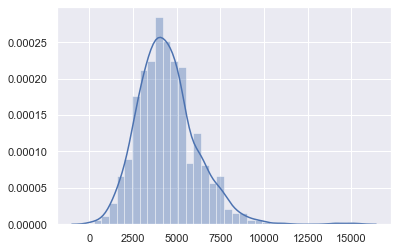

In [147]:
sns.set(color_codes=True)
sns.distplot(duration_by_bike);